<a href="https://colab.research.google.com/github/armanalam6342/Face-Emotion-Recognition/blob/main/face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing all the required Libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,GlobalMaxPool2D,Activation,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np 
import cv2
import os
from sklearn.metrics import confusion_matrix
import itertools
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [3]:
train_path = '/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/train'
val_path = '/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/test'

In [4]:
categories = os.listdir(train_path)
print(categories)

['angry', 'fearful', 'disgusted', 'surprised', 'happy', 'sad', 'neutral']


# Count of images in each category

In [7]:
total_train_images = 0
for dir_ in os.listdir(train_path):
    count = 0
    for f in os.listdir(train_path+'/' + dir_+"/"):
        count += 1
        total_train_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal train images are {total_train_images}")

sad has 4830 number of images
angry has 4005 number of images
fearful has 4097 number of images
disgusted has 436 number of images
surprised has 3171 number of images
happy has 7215 number of images
neutral has 4975 number of images

total train images are 28729


In [8]:
total_validation_images = 0
for dir_ in os.listdir(val_path):
    count = 0
    for f in os.listdir(val_path+'/' + dir_+"/"):
        count += 1
        total_validation_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal validation images are {total_validation_images}")

neutral has 1233 number of images
disgusted has 111 number of images
fearful has 1024 number of images
happy has 1774 number of images
angry has 958 number of images
sad has 1247 number of images
surprised has 831 number of images

total validation images are 7178


#Showing some images from training set

In [ ]:
# Creating a function for using for show some images from each categories
def imageshow(category):
  plt.figure(figsize= (8,8))
  for i in range(1, 10, 1):
      plt.subplot(3,3,i)
      img = load_img(train_path+'/'+category+"/"+
                    os.listdir(train_path + "/" + category)[i], target_size=(48,48))
      plt.imshow(img)
  plt.suptitle(category,fontsize=30)   
  plt.show()

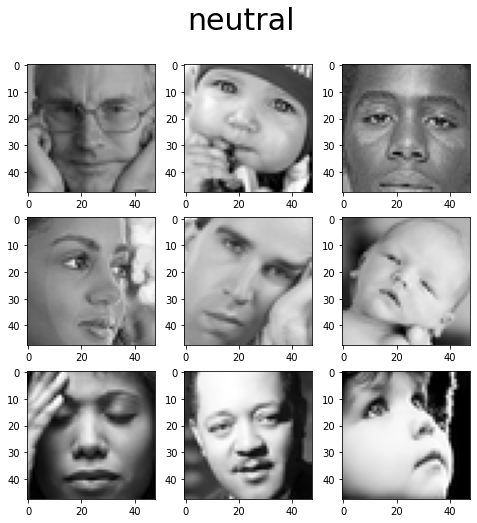

In [ ]:
#Showing some images from category neutral
imageshow('neutral')

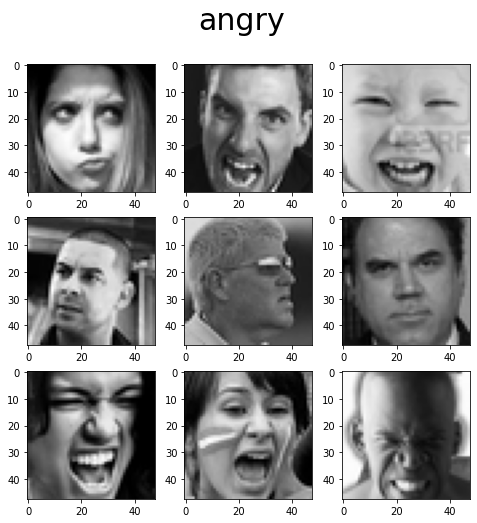

In [ ]:
#Showing some images from category angry
imageshow('angry')

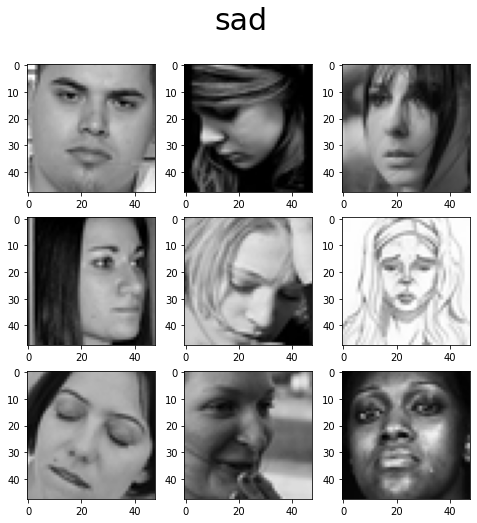

In [ ]:
#Showing some images from category sad
imageshow('sad')

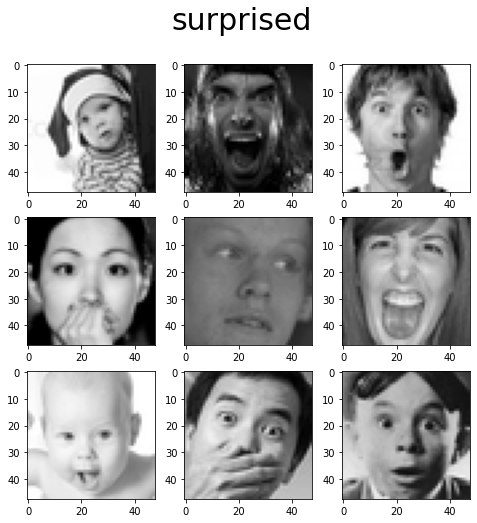

In [ ]:
#Showing some images from category surprise
imageshow('surprised')

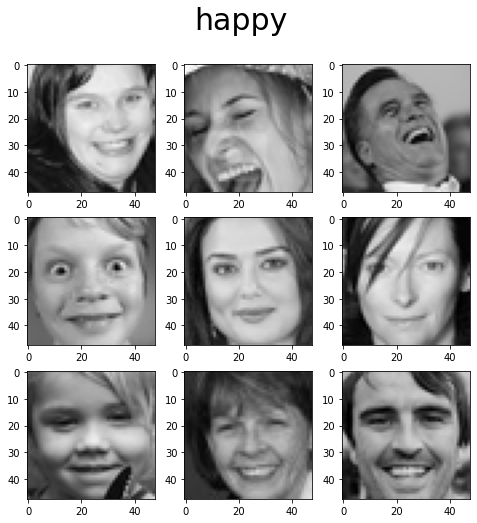

In [ ]:
#Showing some images from category happy
imageshow('happy')

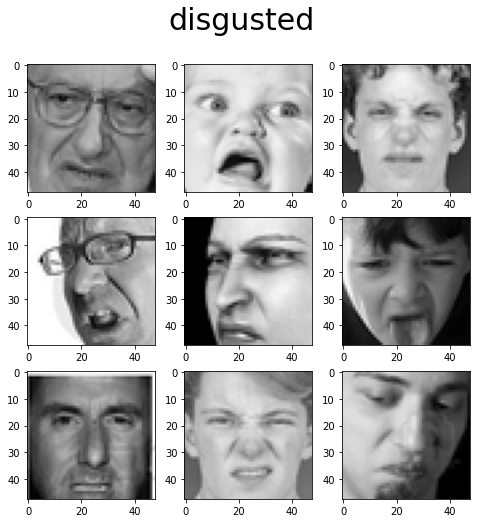

In [ ]:
#Showing some images from category disgust
imageshow('disgusted')

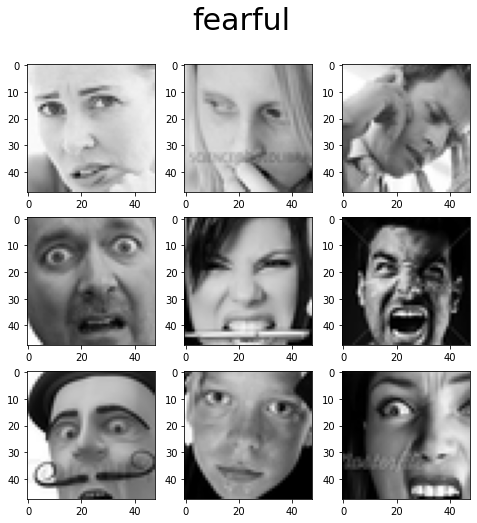

In [ ]:
#Showing some images from category fear
imageshow('fearful')

## Showing some images from validation set

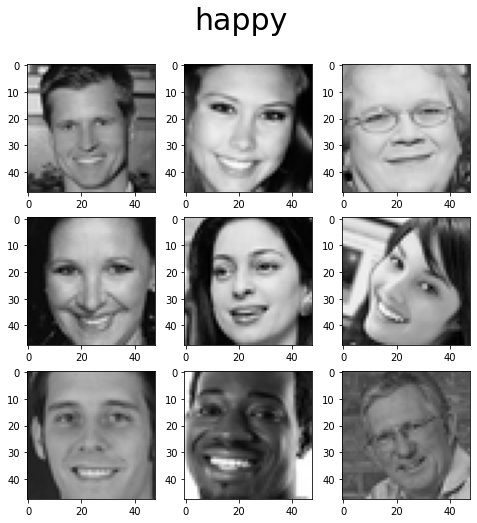

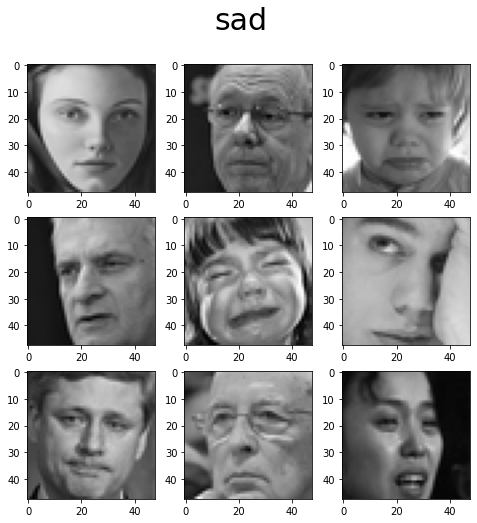

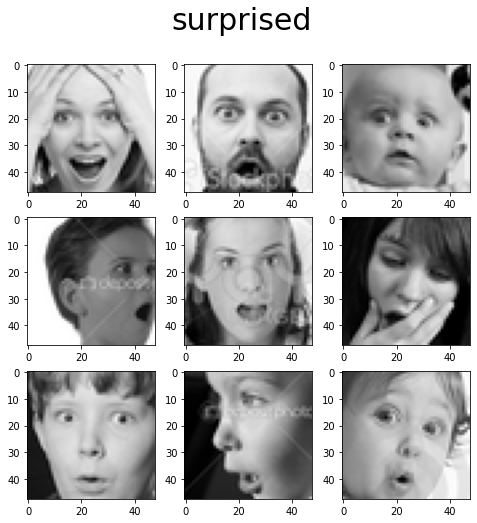

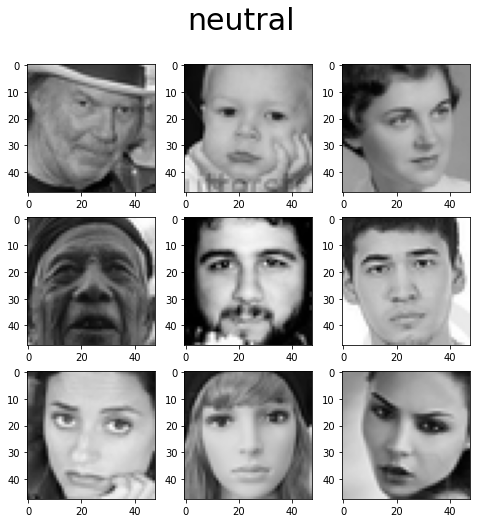

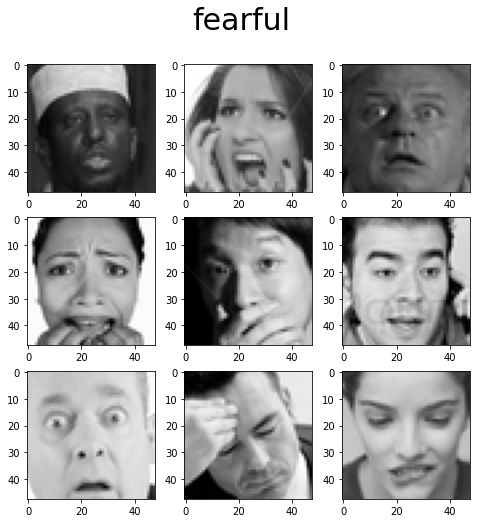

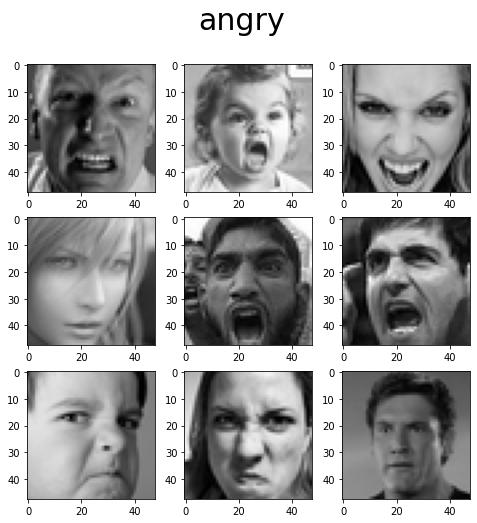

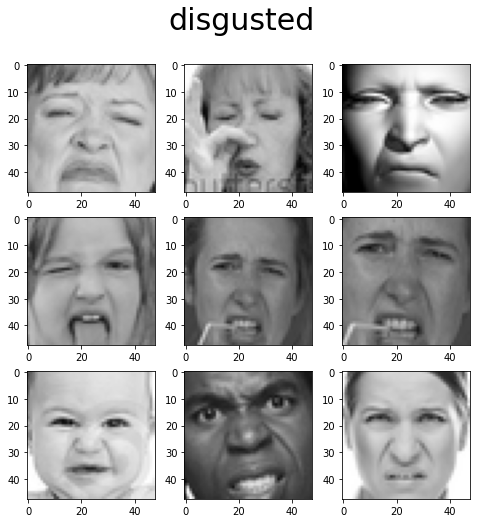

In [ ]:
# validation set images
for category in categories:
    plt.figure(figsize= (8,8))
    for j in range(1,10,1):
        
        plt.subplot(3,3,j)
        
        img = load_img(val_path+'/'+category+"/"+
                    os.listdir(val_path + "/" + category)[j], target_size=(48,48))
        plt.imshow(img)
    plt.suptitle(category,fontsize=30)
    plt.show()

# Data prepration for Self custom CNN model

In [5]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True,
                                   brightness_range=[0.8,1.2],
                                   rescale=1./255)
train_data = datagen_train.flow_from_directory(train_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

datagen_validation = ImageDataGenerator(rescale=1./255)
validation_data = datagen_validation.flow_from_directory(val_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

Found 28729 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#Model Building

In [12]:
num_classes = 7
model = Sequential()
#the 1-st block
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1',input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool1_1'))
model.add(Dropout(0.3, name = 'drop1_1'))#the 2-nd block
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool2_1'))
model.add(Dropout(0.3, name = 'drop2_1'))#the 3-rd block
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool3_1'))
model.add(Dropout(0.3, name = 'drop3_1'))#the 4-th block
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool4_1'))
model.add(Dropout(0.3, name = 'drop4_1'))

#the 5-th block
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool5_1'))
model.add(Dropout(0.3, name = 'drop5_1'))#Flatten and output
model.add(Flatten(name = 'flatten'))
model.add(Dense(num_classes, activation='softmax', name = 'output'))# create model 

# summary layers


# compiling the model
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_17 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0         
                                                                 
 drop1_1 (Dropout)           (None, 24, 24, 64)       

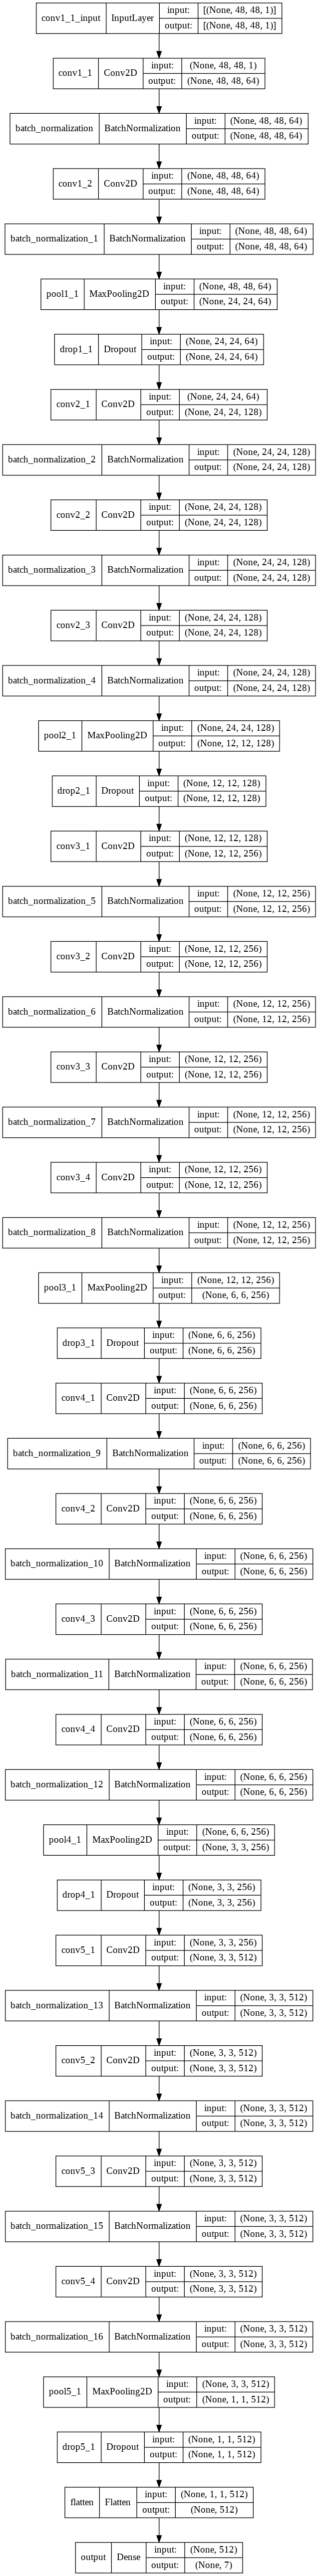

In [11]:
utils.plot_model(model, to_file='emotion-model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [9]:
epochs=100
steps_per_epoch=train_data.n//train_data.batch_size
print(steps_per_epoch)

validation_steps=validation_data.n//validation_data.batch_size
print(validation_steps)

448
112


In [10]:
#  adding various CAllBacks to prevent overfiiting
# # this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0001, mode='auto')
# to save model weights 
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr, early_stopping]

In [ ]:
# fitting the model
history = model.fit(
    x=train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_data,
    validation_steps = validation_steps,
    callbacks=callbacks,
    verbose=1)

In [ ]:
model.save("CNN_Model.h5")

In [ ]:
model_emo = load_model('/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/CNN_Model_emotion.h5')

In [ ]:
predictions=model_emo.predict(validation_data)

KeyboardInterrupt: ignored

In [ ]:
 # Accuracy Score of Our Model
accuracy=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=validation_data.classes)
print(accuracy) 

In [ ]:
#Plotting Accuracy & Loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# show the confusion matrix of our predictions

# compute predictions

y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_data.classes
class_names = validation_data.class_indices.keys()


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()